# Case - Online Order Fulfillment Center:
1. Compute the empirical PMF of the number of packing errors per batch.
2. Plot the empirical PMF using a bar chart (you may use Python, Excel, or draw manually).
3. What is the estimated probability that a randomly selected batch has 2 packing errors? Interpret
this result in the context of quality control.(Hint: use the empirical mean)
4. You suspect that the number of packing errors follows a Binomial distribution with number of trials
n = 5 (since each batch has 5 items
Estimate the unknown parameter ˆp(probability of an item being packed incorrectly).
Justify your modeling choice and compare the empirical PMF with the theoretical Binomial distribution
using the estimated ˆp.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

#Q1
x = np.array([0,1,2,3,4,5])
f = np.array([240,190,110,40,15,5])
N = f.sum() #number of batches

#pmf
empirical_pmf = f/N
empirical_pmf

array([0.4       , 0.31666667, 0.18333333, 0.06666667, 0.025     ,
       0.00833333])

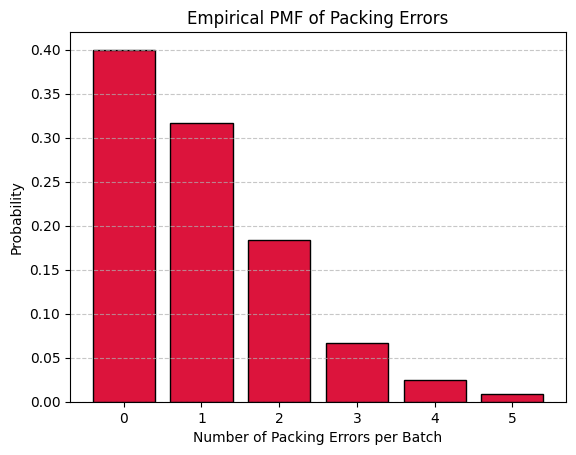

In [ ]:
#Q2

plt.bar(x, empirical_pmf, color='crimson', edgecolor='black')
plt.title('Empirical PMF of Packing Errors')
plt.xlabel('Number of Packing Errors per Batch')
plt.ylabel('Probability')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(x)
plt.show()


In [ ]:
#Q3

p_x2 = empirical_pmf[2]
print(f"Estimated P (x =2): {p_x2:4f} =>  {p_x2*100:.2f}% chance")



Estimated P (x =2): 0.183333 =>  18.33% chance


In [ ]:
#Q4

empirical_mean = np.sum(x*empirical_pmf)
p_hat = empirical_mean/5 # because n = 5
print(f"Empirical Mean: {empirical_mean:.3f}")
print(f"Estimated p (probability of a packing error): {p_hat:3f}")

Empirical Mean: 1.025
Estimated p (probability of a packing error): 0.205000


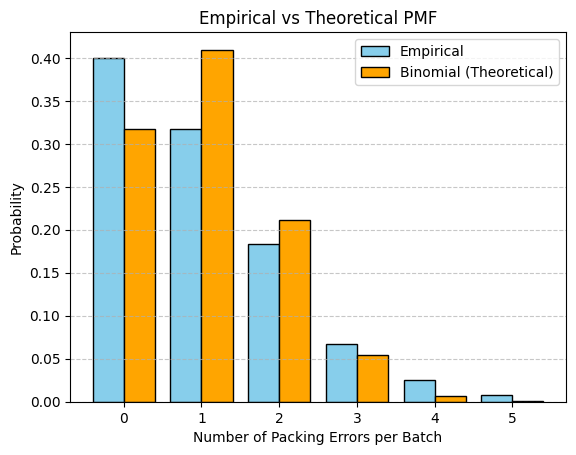

In [ ]:
# Comparing with Binomial distribution
from scipy.stats import binom

n = 5
theoretical_pmf = binom.pmf(x, n, p_hat)
plt.bar(x - 0.2, empirical_pmf, width=0.4, label='Empirical', color='skyblue', edgecolor='black')
plt.bar(x + 0.2, theoretical_pmf, width=0.4, label='Binomial (Theoretical)', color='orange', edgecolor='black')
plt.title('Empirical vs Theoretical PMF')
plt.xlabel('Number of Packing Errors per Batch')
plt.ylabel('Probability')
plt.xticks(x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
df.loc[df["Times Used"] > 20, "Times Used"] = 20

In [ ]:
df.reset_index(drop=True, inplace=True)

# Step 9: Final check (optional)
print("\nCleaned summary of 'Times Used':")
print(df["Times Used"].describe())


Cleaned summary of 'Times Used':
count    25.000000
mean      3.240000
std       2.602563
min       0.000000
25%       1.000000
50%       3.000000
75%       5.000000
max      10.000000
Name: Times Used, dtype: float64


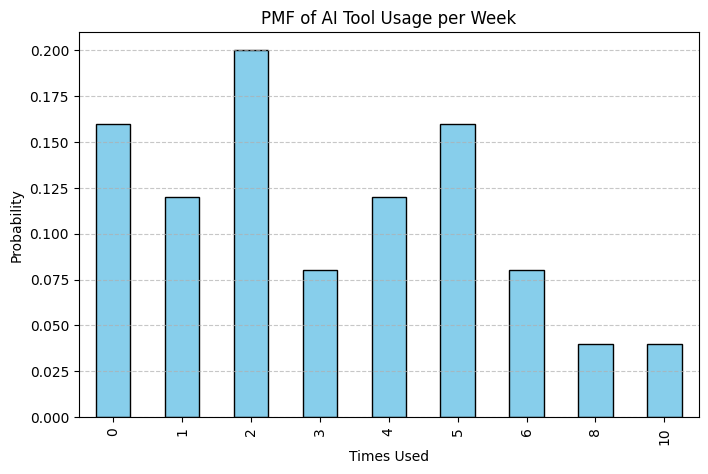

In [ ]:
# Calculate PMF
pmf = df["Times Used"].value_counts(normalize=True).sort_index()

# Plot PMF
plt.figure(figsize=(8, 5))
pmf.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("PMF of AI Tool Usage per Week")
plt.xlabel("Times Used")
plt.ylabel("Probability")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
print("Mean:", df["Times Used"].mean())
print("Median:", df["Times Used"].median())
print("Standard Deviation:", df["Times Used"].std())


Mean: 3.24
Median: 3.0
Standard Deviation: 2.6025628394590847


Confidence Level
Not at all confident    3.500000
Not used                5.000000
Not very confident      1.571429
Somewhat confident      4.800000
Very confident          2.714286
Name: Times Used, dtype: float64


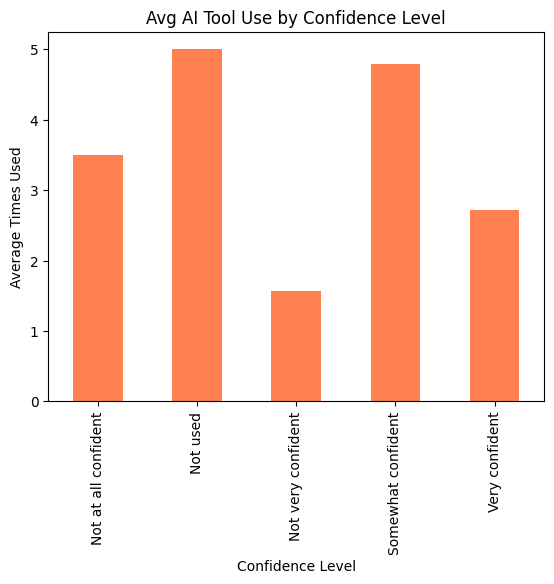

In [ ]:
grouped = df.groupby("Confidence Level")["Times Used"].mean()
print(grouped)
grouped.plot(kind="bar", title="Avg AI Tool Use by Confidence Level", color="coral")
plt.ylabel("Average Times Used")
plt.show()


# Survey form Analysis

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import poisson

df = pd.read_csv("/content/drive/MyDrive/AI Survey form (Responses) - Puskar Koirala.csv")


In [12]:
# Strip column names to avoid space issues
df.columns = df.columns.str.strip()

In [13]:
# Convert all "Yes" to 1 and "No" to 2
df = df.replace({'Yes': 1, 'No': 2})

/tmp/ipython-input-4001583910.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 2})


In [14]:
# Convert column 5 to numeric explicitly (confidence column)
confidence_col = '5. Do you feel confident using AI tools?'
df[confidence_col] = pd.to_numeric(df[confidence_col])

In [18]:
# Frequency table
frequency_table = df[confidence_col].value_counts().sort_index()
print(" Frequency Table:\n", frequency_table)

 Frequency Table:
 5. Do you feel confident using AI tools?
1    2
2    3
3    5
4    7
5    4
Name: count, dtype: int64


In [19]:
# Empirical PMF
empirical_pmf = df[confidence_col].value_counts(normalize=True).sort_index()
print("\n Empirical PMF:\n", empirical_pmf)


📈 Empirical PMF:
 5. Do you feel confident using AI tools?
1    0.095238
2    0.142857
3    0.238095
4    0.333333
5    0.190476
Name: proportion, dtype: float64


In [20]:
# Sample statistics
sample_mean = df[confidence_col].mean()
sample_variance = df[confidence_col].var()
print(f"\n Sample Mean: {sample_mean:.2f}")
print(f" Sample Variance: {sample_variance:.2f}")


 Sample Mean: 3.38
 Sample Variance: 1.55


In [21]:
# Poisson PMF
x = np.arange(df[confidence_col].min(), df[confidence_col].max() + 1)
poisson_pmf = poisson.pmf(x, mu=sample_mean)

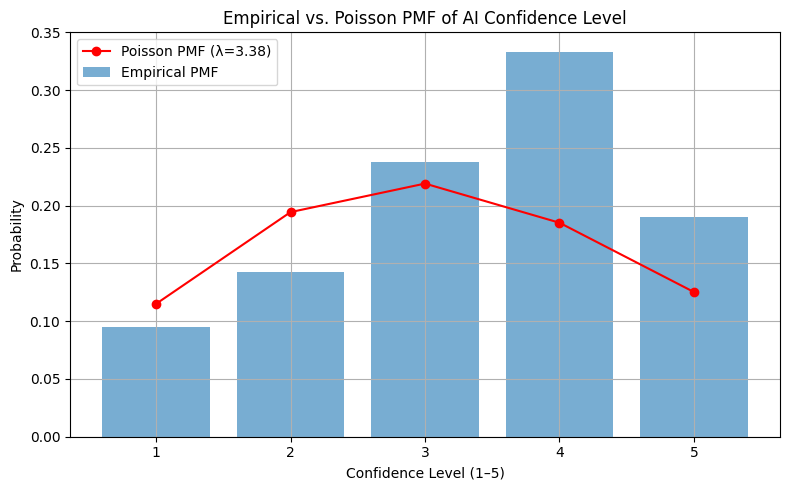

In [ ]:
# Plot
plt.figure(figsize=(8, 5))
plt.bar(empirical_pmf.index, empirical_pmf.values, alpha=0.6, label='Empirical PMF')
plt.plot(x, poisson_pmf, 'ro-', label=f'Poisson PMF (λ={sample_mean:.2f})')
plt.title("Empirical vs. Poisson PMF of AI Confidence Level")
plt.xlabel("Confidence Level (1–5)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# what your variable measured and why it matters?

The variable measured was the confidence level in using AI tools, rated on a scale from 1 to 5. This is important because it indicates how comfortable and capable individuals feel when interacting with AI, which can influence their willingness to adopt and effectively use such tools in academic or professional settings.


# Any challenges you faced in survey design or data collection?

One challenge was the use of simple Yes/No questions, which limited the detail in responses. Additionally, interpreting confidence on a 1–5 scale can vary between individuals, and responses might be biased due to self-reporting or misunderstanding of the questions.

# Whether your theoretical model fit the data well

The Poisson distribution was used to model the confidence data, but it did not fit the empirical distribution well. This is because Poisson assumes count-based data with a potentially infinite range, whereas confidence scores are ordinal and limited to a fixed scale (1–5).

# What you would do differently if you repeated this experiment?

If repeating the experiment, I would redesign the survey with more detailed frequency options, expand the confidence scale for better granularity, and apply statistical models suited for ordinal data, such as ordinal logistic regression, to better capture patterns in user responses.